In [52]:
import pandas as pd

metrics_merged = pd.read_csv("metric_values.csv")

In [53]:
metrics_merged.head()

,model,metric,train,test
0,DNN ESM2 3B,mPrecision,0.980186,0.920965
1,DNN ESM2 3B,mRecall,0.987387,0.886325
2,DNN ESM2 3B,mF1,0.983515,0.899392
3,DNN ESM2 3B,mPrecision level 1,0.995490,0.984224
4,DNN ESM2 3B,mRecall level 1,0.996687,0.978414


In [54]:
# divide into 5 dataframes, one for each metric level which is in the column "metric" as a string
metrics_merged_1 = metrics_merged[metrics_merged["metric"].str.contains(" 1")]
metrics_merged_2 = metrics_merged[metrics_merged["metric"].str.contains("2")]
metrics_merged_3 = metrics_merged[metrics_merged["metric"].str.contains("3")]
metrics_merged_4 = metrics_merged[metrics_merged["metric"].str.contains("4")]
metrics_merged_overall = metrics_merged[~metrics_merged["metric"].str.contains("level")]

In [55]:
metrics_merged_1_f1 = metrics_merged_1[metrics_merged_1["metric"].str.contains("F1")]
metrics_merged_2_f1 = metrics_merged_2[metrics_merged_2["metric"].str.contains("F1")]
metrics_merged_3_f1 = metrics_merged_3[metrics_merged_3["metric"].str.contains("F1")]
metrics_merged_4_f1 = metrics_merged_4[metrics_merged_4["metric"].str.contains("F1")]
metrics_merged_merged = pd.concat([metrics_merged_1_f1, metrics_merged_2_f1, metrics_merged_3_f1, metrics_merged_4_f1])

In [56]:
color_map = {'DNN ESM2 35M': (0.00392156862745098,
  0.45098039215686275,
  0.6980392156862745),
 'DNN ESM2 150M': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 'DNN ESM2 8M': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 'DNN ProtBERT': (0.8352941176470589, 0.3686274509803922, 0.0),
 'DNN ESM2 3B': (0.8, 0.47058823529411764, 0.7372549019607844),
 'DNN ESM2 650M': (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 'DNN ESM1b': (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 'DeepEC CNN3': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'D-SPACE EC': (0.9254901960784314, 0.8823529411764706, 0.2),
 'Models + BLASTp': (0.00392156862745098,
  0.45098039215686275,
  0.6980392156862745),
 'Models ensemble': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
    'BLASTp': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),}

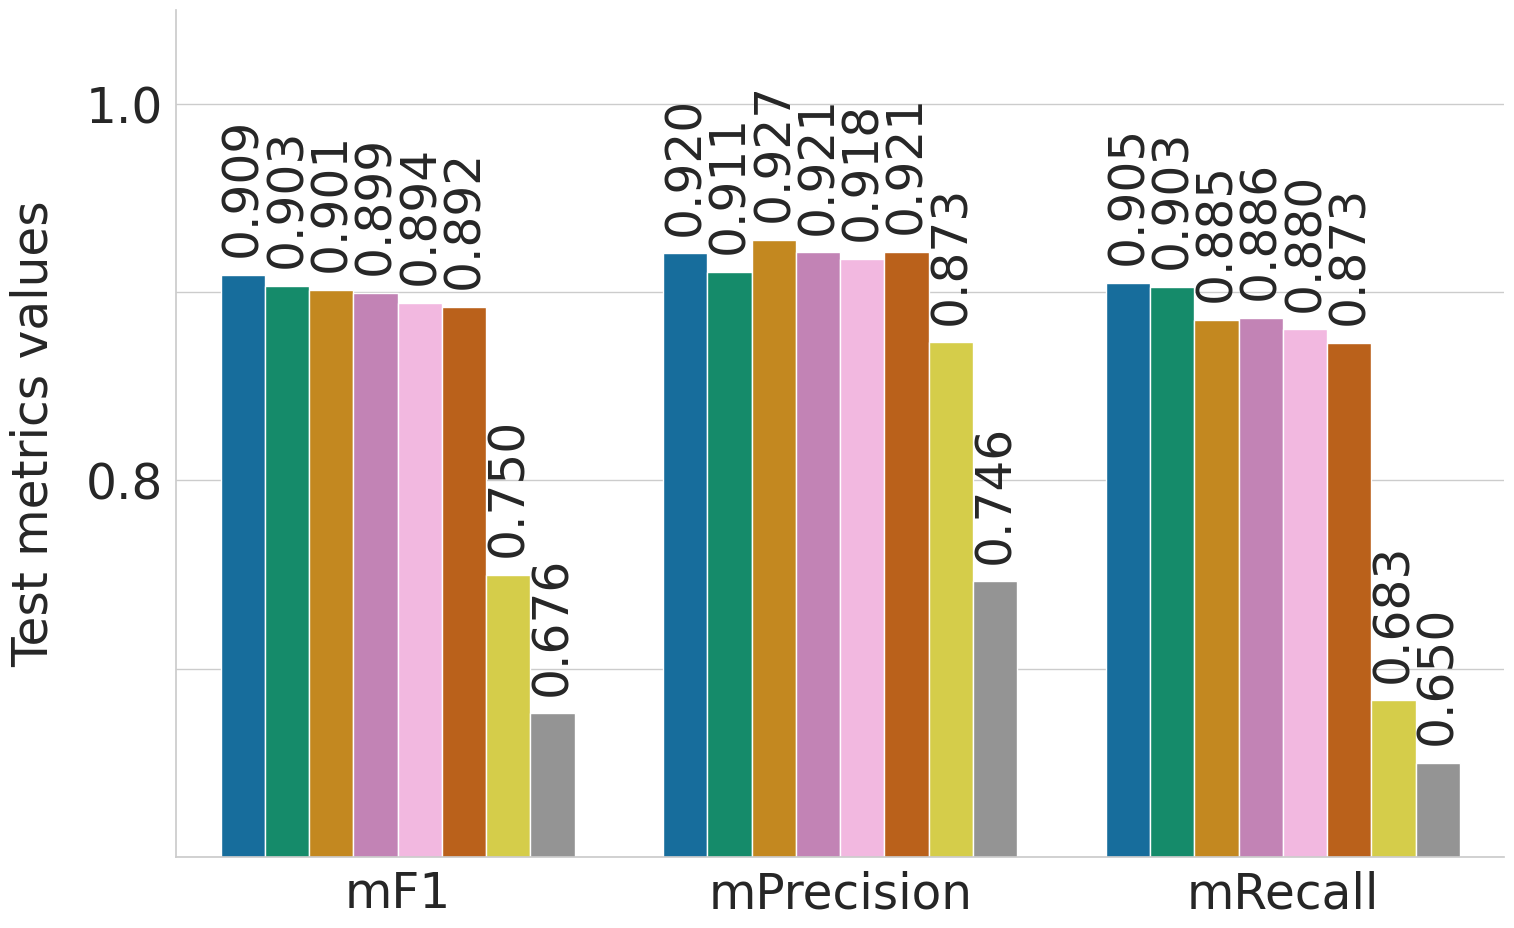

In [57]:
# generate a barplot with all metrics

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.transparent'] = True

metrics_merged_overall = metrics_merged_overall.sort_values(by=['metric', 'test'], ascending=[True, False])

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette("Set2")
 

g = sns.catplot(x="metric", y="test", hue="model", data=metrics_merged_overall, kind="bar", height=10, aspect=1.5, palette=color_map, legend=False)


# sort the bars by mF1
#plt.title("Overall Metrics for Test Set", pad=10, fontsize=30)
plt.xlabel("")
plt.ylabel("Test metrics values", labelpad=20, fontsize=35)
#legend.set_title("Method",prop={"size":30})
 
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'),
                    (p.get_x() + p.get_width() / 2., p.get_height() +  0.04),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=35,  # Adjust the fontsize here
                    rotation=90)
 
 
g.set_xticklabels(size=35)
g.set_yticklabels(size=35)
g.set(ylim=(0.6, 1.05), yticks=[0.6, 0.7, 0.8, 0.9, 1.0])
plt.savefig("overall_metrics.png", dpi=400, bbox_inches='tight')

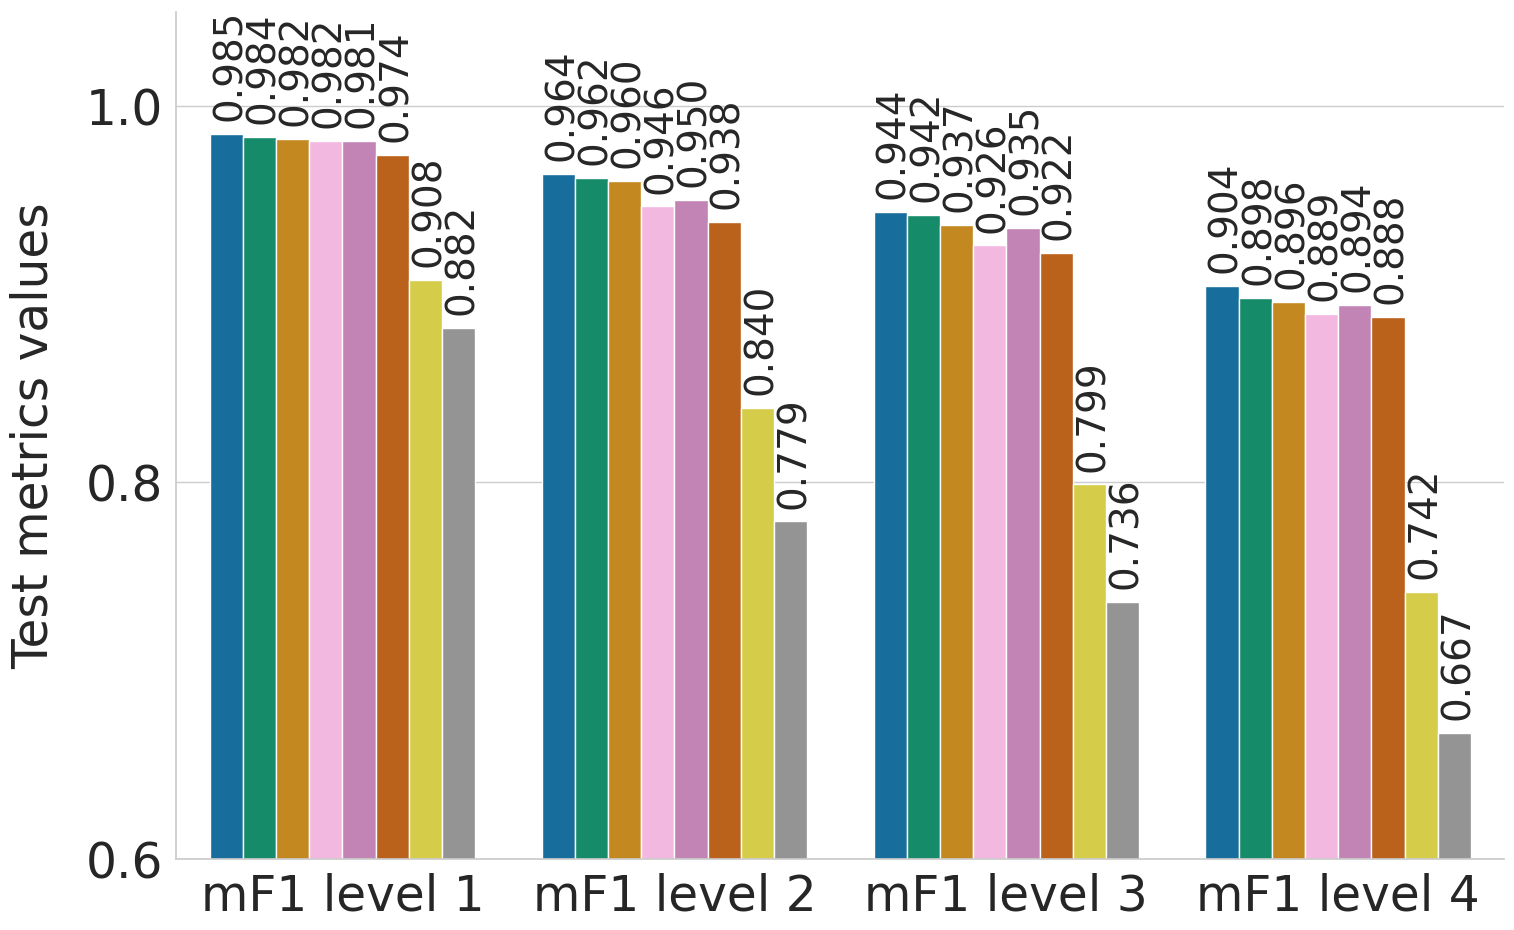

In [59]:
# generate a barplot with all metrics

import seaborn as sns
import matplotlib.pyplot as plt

metrics_merged_merged = metrics_merged_merged.sort_values(by=['metric', 'test'], ascending=[True, False])

sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette("Set2")
matplotlib.rcParams['savefig.transparent'] = True
 
g = sns.catplot(x="metric", y="test", hue="model", data=metrics_merged_merged, kind="bar", height=10, aspect=1.5, palette=color_map, legend=False)

# sort the bars by mF1
#plt.title("mF1 Scores for Test Set", pad=10, fontsize=30)
plt.ylabel("Test metrics values", labelpad=20, fontsize=35)
 
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'),
                    (p.get_x() + p.get_width() / 2 + 0.01, p.get_height() +  0.03),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=28,  # Adjust the fontsize here
                    rotation=90)

legend = plt.legend(bbox_to_anchor=(0.05, -0.3), loc=2, borderaxespad=0., prop={'size': 45}, ncol=2)
fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("legend.png", dpi="figure", bbox_inches=bbox)
legend.remove()

plt.xlabel("")

g.set_xticklabels(size=35)
g.set_yticklabels(size=35)
g.set(ylim=(0.6, 1.05))
plt.savefig("mf1_metrics_levels.png", dpi=400, bbox_inches='tight')